聚类分析或聚类是对一组对象进行分组的任务，使得同一组（称为聚类）中的对象（在某种意义上）与其他组（聚类）中的对象更相似（在某种意义上）。它是探索性数据挖掘的主要任务，也是统计 数据分析的常用技术，用于许多领域，包括机器学习，模式识别，图像分析，信息检索，生物信息学，数据压缩和计算机图形学。

聚类分析本身不是一个特定的算法，而是要解决的一般任务。它可以通过各种算法来实现，这些算法在理解群集的构成以及如何有效地找到它们方面存在显着差异。流行的群集概念包括群集成员之间距离较小的群体，数据空间的密集区域，间隔或特定的统计分布。因此，聚类可以表述为多目标优化问题。适当的聚类算法和参数设置（包括距离函数等参数）使用，密度阈值或预期聚类的数量）取决于个体数据集和结果的预期用途。这样的聚类分析不是自动任务，而是涉及试验和失败的知识发现或交互式多目标优化的迭代过程。通常需要修改数据预处理和模型参数，直到结果达到所需的属性。

常用的聚类算法分为基于划分、层次、密度、网格、统计学、模型等类型的算法，典型算法包括K均值（经典的聚类算法）、DBSCAN、两步聚类、BIRCH、谱聚类等。

聚类算法中k-means是最常使用的方法之一，但是k-means要注意数据异常：
1. 数据异常值。数据中的异常值能明显改变不同点之间的距离相识度，并且这种影响是非常显著的。因此基于距离相似度的判别模式下，异常值的处理必不可少。
2. 数据的异常量纲。不同的维度和变量之间，如果存在数值规模或量纲的差异，那么在做距离之前需要先将变量归一化或标准化。例如跳出率的数值分布区间是[0,1]，订单金额可能是[0,10000 000]，而订单数量则是[0,1000]，如果没有归一化或标准化操作，那么相似度将主要受到订单金额的影响。

有异常的数据可以使用DBSCAN聚类方法进行处理，DBSCAN的全称是Density-Based Spatial Clustering of Applications with Noise，中文含义是“基于密度的带有噪声的空间聚类”。
跟K均值相比，它具有以下优点：
+ 原始数据分布规律没有明显要求，能适应任意数据集分布形状的空间聚类，因此数据集适用性更广，尤其是对非凸装、圆环形等异性簇分布的识别较好。
+ 无需指定聚类数量，对结果的先验要求不高
+ 由于DBSCAN可区分核心对象、边界点和噪点，因此对噪声的过滤效果好，能有效应对数据噪点。

由于他对整个数据集进行操作且聚类时使用了一个全局性的表征密度的参数，因此也存在比较明显的弱点：
+ 对于高纬度问题，基于半径和密度的定义成问题。
+ 当簇的密度变化太大时，聚类结果较差。
+ 当数据量增大时，要求较大的内存支持，I/O消耗也很大。


K均值在算法稳定性、效率和准确率（相对于真实标签的判别）上表现非常好，并且在应对大量数据时依然如此。它的算法时间复杂度上界为O(n*k*t)，其中n是样本量、k是划分的聚类数、t是迭代次数。当聚类数和迭代次数不变时，K均值的算法消耗时间只跟样本量有关，因此会呈线性增长趋势。

但是当面对海量数据时，k均值算法计算速度慢会产生延时，尤其算法被用于做实时性处理时这种弊端尤为明显。针对K均值的这一问题，很多延伸算法出现了，MiniBatchKMeans就是其中一个典型代表。MiniBatchKMeans使用了一个种名为Mini Batch（分批处理）的方法计算数据点之间的距离。Mini Batch的好处是计算过程中不必使用所有的数据样本，而是从不同类别的样本中抽取一部分样本（而非全部样本）作为代表参与聚类算法过程。由于计算样本量少，所以会相应减少运行时间；但另一方面，由于是抽样方法，抽样样本很难完全代表整体样本的全部特征，因此会带来准确度的小幅度下降，但是并不明显。

使用聚类分析中间预处理
1. 图像压缩
用较少的数据量来表示原有的像素矩阵的过程，这个过程称为图像编码。数据图像的显著特点是数据量庞大，需要占用相当大的储存空间，这给图像的存储、计算、传输等带来了不便。因此，现在大多数数字网络下的图像都会经过压缩后再做进一步应用，图像压缩的方法之一便是聚类算法。
在使用聚类算法做图像压缩时，我们会定义K个颜色数（例如128种颜色），颜色数就是聚类类别的数量；K均值聚类算法会把类似的颜色分别放在K个簇中，然后每个簇使用一种颜色来代替原始颜色，那么结果就是有多少个簇，就生成了多少种颜色构成的图像，由此实现图像压缩。
2. 图像分割
图像分割就是把图像分成若干个特定的、具有独特性质的区域并提出感兴趣的目标技术和过程，这是图像处理和分析的关键步骤。图像分割后提取出的目标可以用于图像语义识别，图像搜索等领域。例如从图像中分割出前景人脸信息，然后做人脸识别。聚类算法是图像分割方法的一种，其实施的关键是通过不同区域间明显不同的图像色彩特征做聚类，聚类数量就是要分割的区域的数量。
3. 图像理解
在图像理解中，有一种称为基于区域的提取方法。基于区域的提取方法是在图像分割和对象识别的前提下进行的，利用对象模板、场景分类器等，通过识别对象及对象之间的拓扑关系挖掘语义，生成对应的场景语义信息。例如，先以颜色、形状等特征对分割后的图像区域进行聚类，形成少量BLOB；然后通过CMRM模型计算出BLOB与某些关键词共同出现的概率。
4. 异常检测
异常检测有多种实施方法，其中常用的方法是基于距离的异常检测方法。即使数据集不满足任何特定分布模型，它仍能有效地发现离群点，特别是当空间维度比较高时，算法的效率比基于密度的方法要高得多。算法具体实现时，首先算出数据样本间的距离（如曼哈顿距离、欧氏距离等），然后对数据做预处理后就可以根据距离的定义来检测异常值。
例如，可以使用K-means的聚类可以将离中心店最远的类或者不属于任何一个类的数据点提取出来，然后将其定义为异常值。

高纬度数据的聚类：
在大数据背景下，有很多高纬度数据场景，如电子商务交易数据、web文本数据日益丰富。高维数据聚类时耗时长、聚类结果准确性和稳定性都不尽如人意。因为，在高维数据，基于距离的相似度计算效率极低；特征值过多在所有维度上存在簇的可能性非常低；由于稀疏性和紧邻特性，基于距离的相似度几乎为0，导致高维空间很难出现数据簇。这时我们可以选着使用子空间聚类，或是降维处理。

子空间聚类算法是在高维数据空间中对传统聚类算法的一种扩展，其思想是选取与给定簇密切相关的维，然后在对应的子空间进行聚类。比如谱聚类就是一种子空间聚类方法，由于选择相关维的方法以及评估子空间的方法需要自定义，因此这种方法对操作者的要求较高。


聚类算法的选择：

+ 数据为高维数据，那么选取子空间聚类（如谱聚类）
+ 数据量在100万条以内，那么使用k均值较好；如果数据量超过100万条，那么可以考虑使用Mini Batch KMeans
+ 如果数据中存在噪点，那么可以使用基于密度的DBSCAN
+ 如果最求更高的分类准确度，那么选择谱聚类将比K均值准确度更好

In [31]:
聚类算法的选择：

+ 数据为高维数据，那么选取子空间聚类（如谱聚类）
+ 数据量在100万条以内，那么使用k均值较好；如果数据量超过100万条，那么可以考虑使用Mini Batch KMeans
+ 如果数据中存在噪点，那么可以使用基于密度的DBSCAN
+ 如果最求更b高的分类准确度，那么选择谱聚类将比K均值准确度更好

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:

# 数据准备
data = make_blobs(n_samples=2000, centers=[[1,1], [-1, -1]], cluster_std=0.7, random_state=2018)
X = data[0]
y = data[1]

#设置聚类数量
n_clusters = 2

# 建立聚类模型对象
kmeans = KMeans(n_clusters=n_clusters, random_state=2018)
# 训练聚类模型
kmeans.fit(X)

# 预测聚类模型
pre_y = kmeans.predict(X)

### 模型效果指标评估 ###
# 样本距离最近的聚类中心的总和
inertias = kmeans.inertia_

# 调整后的兰德指数
adjusted_rand_s = metrics.adjusted_rand_score(y, pre_y)

# 互信息
mutual_info_s = metrics.mutual_info_score(y, pre_y)

# 调整后的互信息
adjusted_mutual_info_s = metrics.adjusted_mutual_info_score(y, pre_y)

# 同质化得分
homogeneity_s = metrics.homogeneity_score(y, pre_y)

# 完整性得分
completeness_s = metrics.completeness_score(y, pre_y)

# V-measure得分
v_measure_s = metrics.v_measure_score(y, pre_y)

# 平均轮廓系数
silhouette_s = metrics.silhouette_score(X, pre_y, metric='euclidean')

# Calinski 和 Harabaz 得分
calinski_harabaz_s = metrics.calinski_harabaz_score(X, pre_y)

df_metrics = pd.DataFrame([[inertias, adjusted_rand_s,mutual_info_s, adjusted_mutual_info_s, homogeneity_s,completeness_s,v_measure_s, silhouette_s ,calinski_harabaz_s]],
                         columns=['ine','tARI','tMI','tAMI','thomo','tcomp','tv_m','tsilh','tc&h'])

df_metrics

D:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


,ine,tARI,tMI,tAMI,thomo,tcomp,tv_m,tsilh,tc&h
0,1880.081227,0.936992,0.611143,0.88165,0.881693,0.881695,0.881694,0.581468,4360.079959


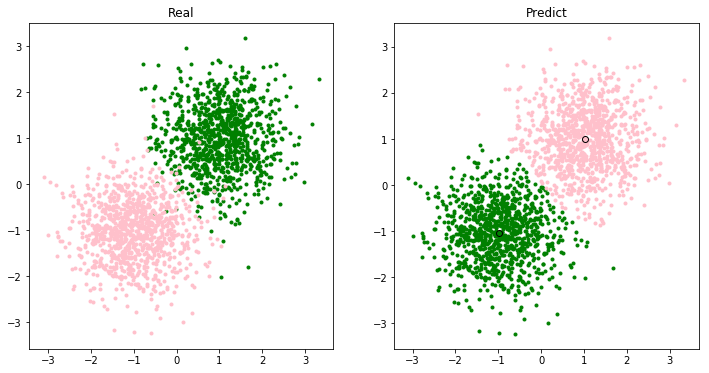

In [3]:
## 模型可视化##
centers = kmeans.cluster_centers_
# 颜色设置
colors = ['green', 'pink']
# 创建画布
plt.figure(figsize=(12,6))
titles = ['Real', 'Predict']
for j, y_ in enumerate([y, pre_y]):
    plt.subplot(1,2, j+1)
    plt.title(titles[j])
    # 循环读类别
    for i in range(n_clusters):
        # 找到相同的索引
        index_sets = np.where(y_ == i)
        # 将相同类的数据划分为一个聚类子集
        cluster = X[index_sets]
        # 展示样本点
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], marker='.')
        if j==1:          
        # 簇中心
            plt.plot(centers[i][0], centers[i][1], 'o',markerfacecolor=colors[i],markeredgecolor='k', markersize=6)
plt.savefig('xx.png')
plt.show()


评估指标解析：
+ inertias:inertias是K均值模型对象的属性，表示样本距离最近的聚类中心的总和，它是作为在没有真实分类结果标签下的非监督式评估指标。该值越小越好，值越小证明样本在类间的分布越集中，即类内的距离越小。
+ adjusted_rand_s：调整后的兰德指数（Adjusted Rand Index），兰德指数通过考虑在预测和真实聚类中在相同或不同聚类中分配的所有样本对和计数对来计算两个聚类之间的相似性度量。调整后的兰德指数通过对兰德指数的调整得到独立于样本量和类别的接近于0的值，其取值范围为[-1, 1]，负数代表结果不好，越接近于1越好意味着聚类结果与真实情况越吻合。
+ mutual_info_s：互信息（Mutual Information, MI），互信息是一个随机变量中包含的关于另一个随机变量的信息量，在这里指的是相同数据的两个标签之间的相似度的量度，结果是非负值。
+ adjusted_mutual_info_s：调整后的互信息（Adjusted Mutual Information, AMI），调整后的互信息是对互信息评分的调整得分。它考虑到对于具有更大数量的聚类群，通常MI较高，而不管实际上是否有更多的信息共享，它通过调整聚类群的概率来纠正这种影响。当两个聚类集相同（即完全匹配）时，AMI返回值为1；随机分区（独立标签）平均预期AMI约为0，也可能为负数。
+ homogeneity_s：同质化得分（Homogeneity），如果所有的聚类都只包含属于单个类的成员的数据点，则聚类结果将满足同质性。其取值范围[0,1]值越大意味着聚类结果与真实情况越吻合。
+ completeness_s：完整性得分（Completeness），如果作为给定类的成员的所有数据点是相同集群的元素，则聚类结果满足完整性。其取值范围[0,1]，值越大意味着聚类结果与真实情况越吻合。
+ v_measure_s：它是同质化和完整性之间的谐波平均值，v = 2 *（均匀性*完整性）/（均匀性+完整性）。其取值范围[0,1]，值越大意味着聚类结果与真实情况越吻合。
+ silhouette_s：轮廓系数（Silhouette），它用来计算所有样本的平均轮廓系数，使用平均群内距离和每个样本的平均最近簇距离来计算，它是一种非监督式评估指标。其最高值为1，最差值为-1,0附近的值表示重叠的聚类，负值通常表示样本已被分配到错误的集群。
+ calinski_harabaz_s：该分数定义为群内离散与簇间离散的比值，它是一种非监督式评估指标。
